In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [151]:
df = pd.read_csv('Housing.csv', delimiter=',', header=0, encoding='utf-8')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [152]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


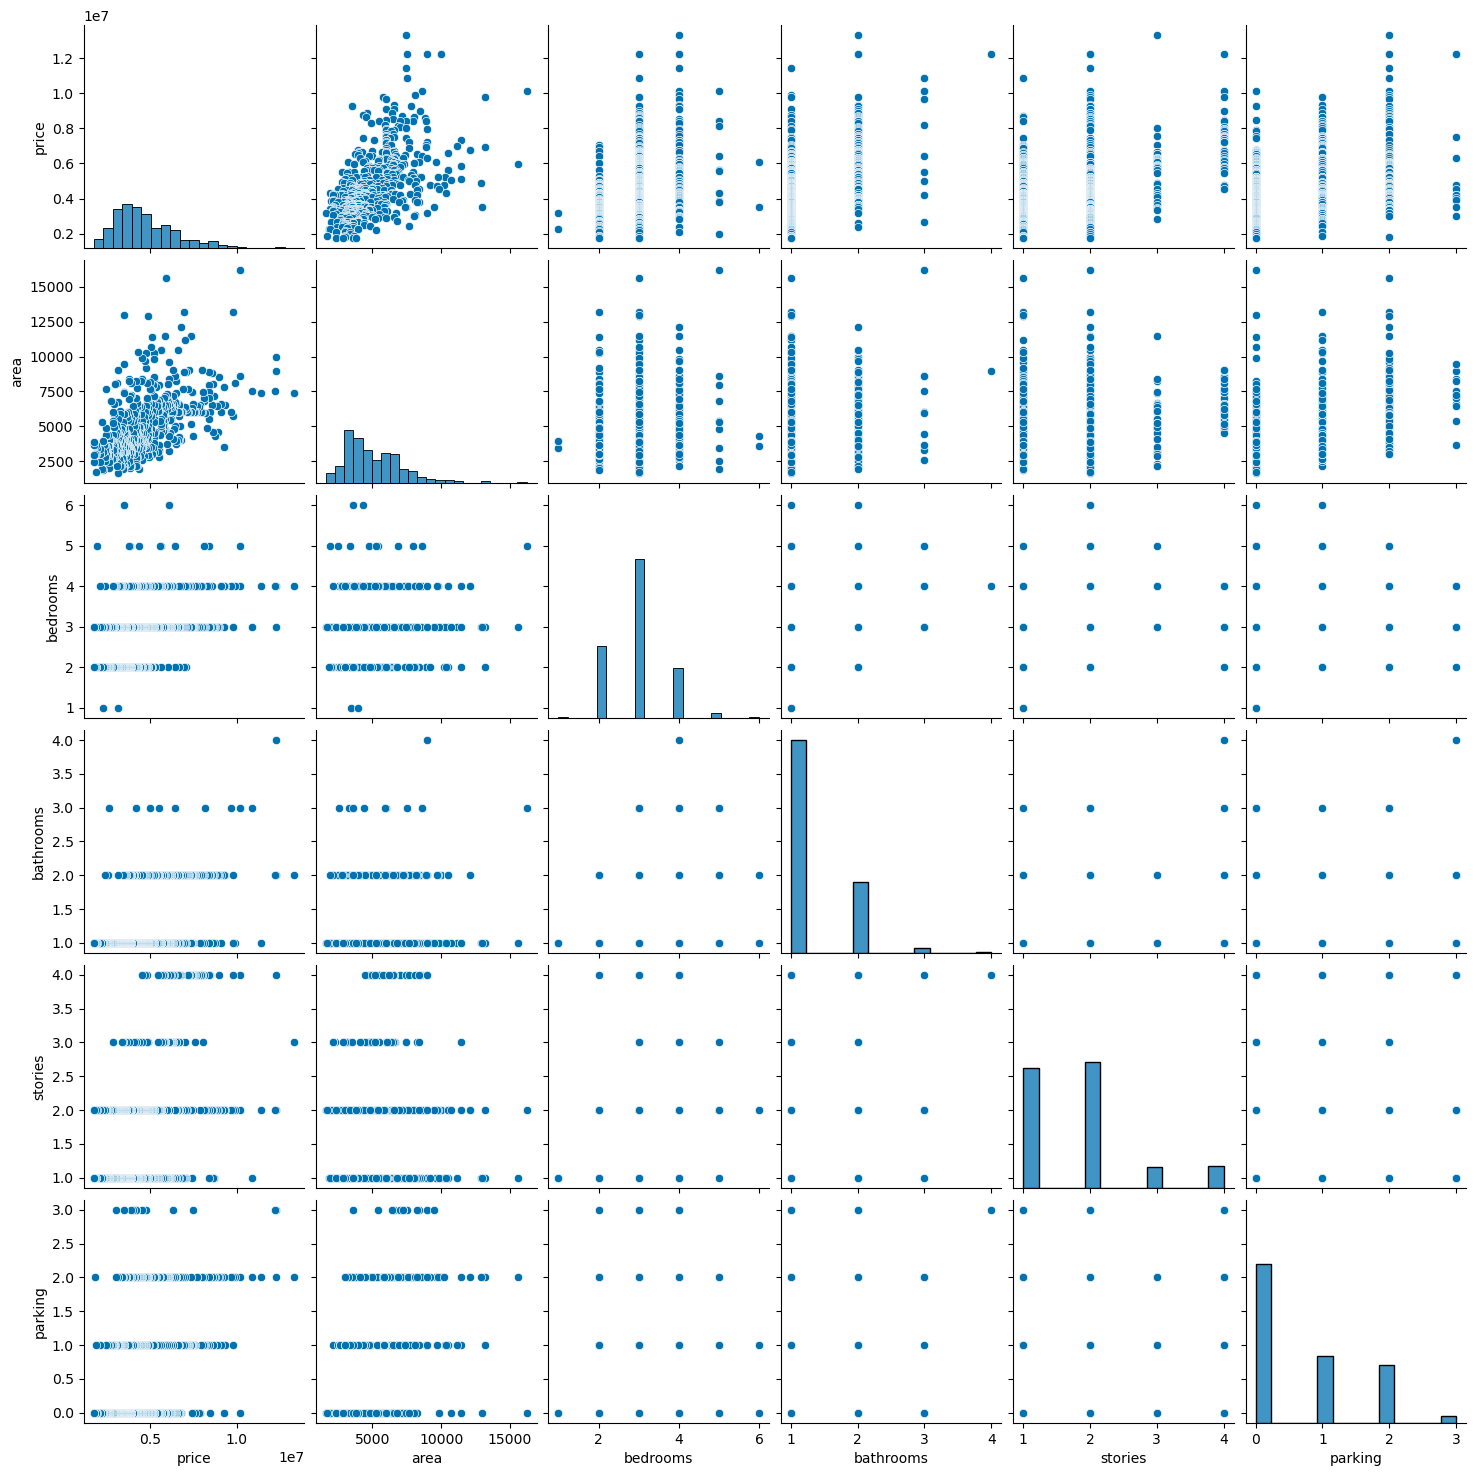

In [153]:
sns.pairplot(df)

Lets try to model the price of a house based on various attributes

The simplest model is :
price $\propto$ area

In [154]:
X = df['area'].values.reshape(-1,1)
y = df['price']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True, stratify=y, random_state=42)

In [156]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
# lm = Ridge(alpha=2)
# lm = Lasso(alpha=2)

lm.fit(X_train, y_train)

y_pred = lm.predict(X_val)

print(f'Price = {lm.coef_[0]} Area + {lm.intercept_}')

print(f"The MSE is {mean_squared_error(y_val, y_pred, squared=False)/1e6}")

print(f"The r2 score is {r2_score(y_val, y_pred)}")

Price = 425.72984193878284 Area + 2512254.2639593435
The MSE is 1.9171037021424233
The r2 score is 0.27287851871974644


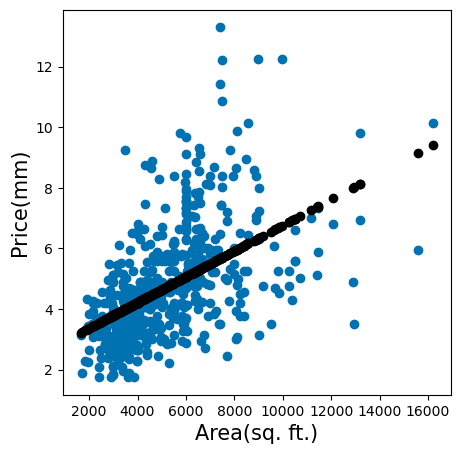

In [157]:
fig, ax = plt.subplots(figsize= (5,5))
ax.plot(df['area'], df['price']/1e6, 'o')
ax.plot(df['area'], lm.predict(df['area'].values.reshape(-1,1))/1e6, 'ko')
ax.set_xlabel('Area(sq. ft.)', size=15)
ax.set_ylabel('Price(mm)', size=15)
plt.show()

Lets add polynomial features

In [158]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.pipeline import Pipeline

X = df['area'].values.reshape(-1,1)
y = df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True, stratify=y, random_state=42)

pipe = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lm', LinearRegression())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

print(f"The MSE is {mean_squared_error(y_val, y_pred, squared=False)/1e6}")
print(f"The r2 score is {r2_score(y_val, y_pred)}")

The MSE is 1.8873273003953452
The r2 score is 0.295290367883815


Lets include bedrooms, bathrooms, stories, parking to the model.

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df[['area','bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle = True)

pipe = Pipeline([('scaler', StandardScaler()), ('lm', LinearRegression())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

# print(f"Price = {pipe['lm'].coef_[0]} Area + {pipe['lm'].coef_[1]} bedrooms + {pipe['lm'].coef_[2]} bathrooms + {pipe['lm'].intercept_}")

print(f"The MSE is {mean_squared_error(y_val, y_pred, squared=False)/1e6}")
print(f"The r2 score is {r2_score(y_val, y_pred)}")

The MSE is 1.174068288386514
The r2 score is 0.4962266778876674


In [160]:
X = df[['area','bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle = True)

pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(3, interaction_only=True, include_bias=False)), ('lm', LinearRegression())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

print(f"The MSE is {mean_squared_error(y_val, y_pred, squared=False)/1e6}")
print(f"The r2 score is {r2_score(y_val, y_pred)}")


The MSE is 1.3519801123002742
The r2 score is 0.5753937963436826


Lets add the categorical terms

In [161]:
categorical = ["mainroad", "guestroom", "basement", "hotwaterheating","airconditioning", "prefarea", "furnishingstatus"]
dum_df = pd.get_dummies(df[categorical], columns=categorical, prefix=["mainroad", "guestroom", "basement", "hotwaterheating","airconditioning", "prefarea", "furnishingstatus"] )
dum_df.columns

Index(['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [162]:
dff = df[[col for col in df.columns if col not in categorical]].join(dum_df)

In [163]:
X = dff[dff.columns[1:]].values
y = dff['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle = True)

pipe = Pipeline([('scaler', StandardScaler()), ('lm', LinearRegression())])
pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(2, interaction_only=True, include_bias=False)), ('lm', Ridge(alpha=1))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

# print(f"Price = {pipe['lm'].coef_[0]} Area + {pipe['lm'].coef_[1]} bedrooms + {pipe['lm'].coef_[2]} bathrooms + {pipe['lm'].intercept_}")

print(f"The MSE is {mean_squared_error(y_val, y_pred, squared=False)/1e6}")
print(f"The r2 score is {r2_score(y_val, y_pred)}")

The MSE is 1.1955462391912197
The r2 score is 0.5965728218056814
